In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def euler_maruyama(seed, X0, t1, t2, N, f, g, sign):
    
    # Set random seed
    np.random.seed(seed)
    
    # Set discretisation, initial value and times at which to evaluate
    dt = np.abs(t2 - t1) / N
    X = [X0]
    t = np.linspace(t1, t2, N + 1)
    
    # Sample Wiener process dW's
    dW = dt ** 0.5 * np.random.normal(size=(N,))
    
    for i in range(N):
        
        # Apply Euler-Maruyama at each point in time
        dX = sign * f(X[-1], t[i]) * dt + g(X[-1], t[i]) * dW[i]
        
        # Store the new X
        X.append(X[-1] + dX)
    
    # Compute W to return it at the end
    W = np.concatenate([[0], np.cumsum(dW)])
    
    return t, X, W


def f_g_sine(omega, mu):
    
    def f(X, t):
        return omega * np.cos(omega * t)
    
    def g(X, t):
        return mu * X
    
    return f, g

In [116]:
# SDE parameters
omega = 2. * np.pi
mu = 0.3

# Seed and integration parameters
seed = 0
X0 = 1
t1 = 0.
t2 = -1.
N = int(1e3)

# Get drift and diffusion functions of our sine model
f, g = f_g_sine(omega=omega, mu=mu)

<Figure size 576x360 with 0 Axes>

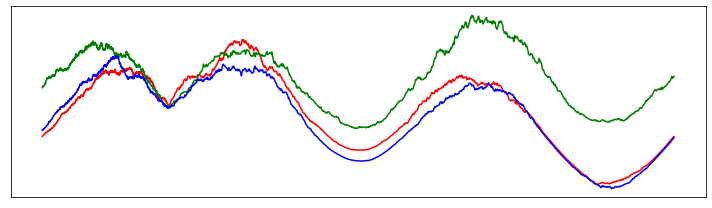

In [114]:
plt.figure(figsize=(8, 5))

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 3))

for i, color in enumerate(colors):
    
    t, X, W = euler_maruyama(seed=i, X0=X0, t1=0., t2=-0.5, N=N, f=f, g=g)
    plt.plot(t, np.array(X), color=color, zorder=1)
    
    t, X, W = euler_maruyama(seed=i, X0=X0, t1=0., t2=2., N=N, f=f, g=g)
    plt.plot(t, np.array(X), color=color, zorder=1)
    
    
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../../../../../../Desktop/fig/sde-motivation.pdf')
plt.show()